## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import gelu
from tensorflow.keras.regularizers import l2

/Users/artemsomar/Desktop/Machine Learning/university/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Data Handling

## Load Data

In [2]:
data = pd.read_csv("data/application_record.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
records = pd.read_csv("data/credit_record.csv")

records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
records['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [6]:
def categorize_status(group):
    if any(s in ['1','2','3','4','5'] for s in group):
        return 2
    elif any(s in ['0', '1','2','3','4','5'] for s in group):
        return 1
    else:
        return 0

client_delay = (
    records.groupby('ID')['STATUS']
           .apply(categorize_status)
           .reset_index()
           .rename(columns={'STATUS':'target'})
)

In [7]:
client_delay['target'].value_counts()

target
1    34682
0     5953
2     5350
Name: count, dtype: int64

In [8]:
df = pd.merge(data, client_delay, how='inner', on='ID')

## Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [10]:
df.nunique()

ID                     36457
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
target                     3
dtype: int64

## Data Visualization

In [11]:
def plot_numeric_histograms(numeric_cols, n_cols=3):
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    i = -1
    for i, col in enumerate(numeric_cols):
        axes[i].hist(df[col], bins=24, color='skyblue', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Кількість')

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def plot_numeric_boxplots(numeric_cols, n_cols=3):
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    i = -1
    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col)

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def plot_categorical_bars(categorical_cols, n_cols=3):
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    i = -1
    for i, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[i], color='lightgreen', edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_ylabel('Кількість')
        axes[i].set_xlabel(col)

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object', 'category'])

### Numeric Features

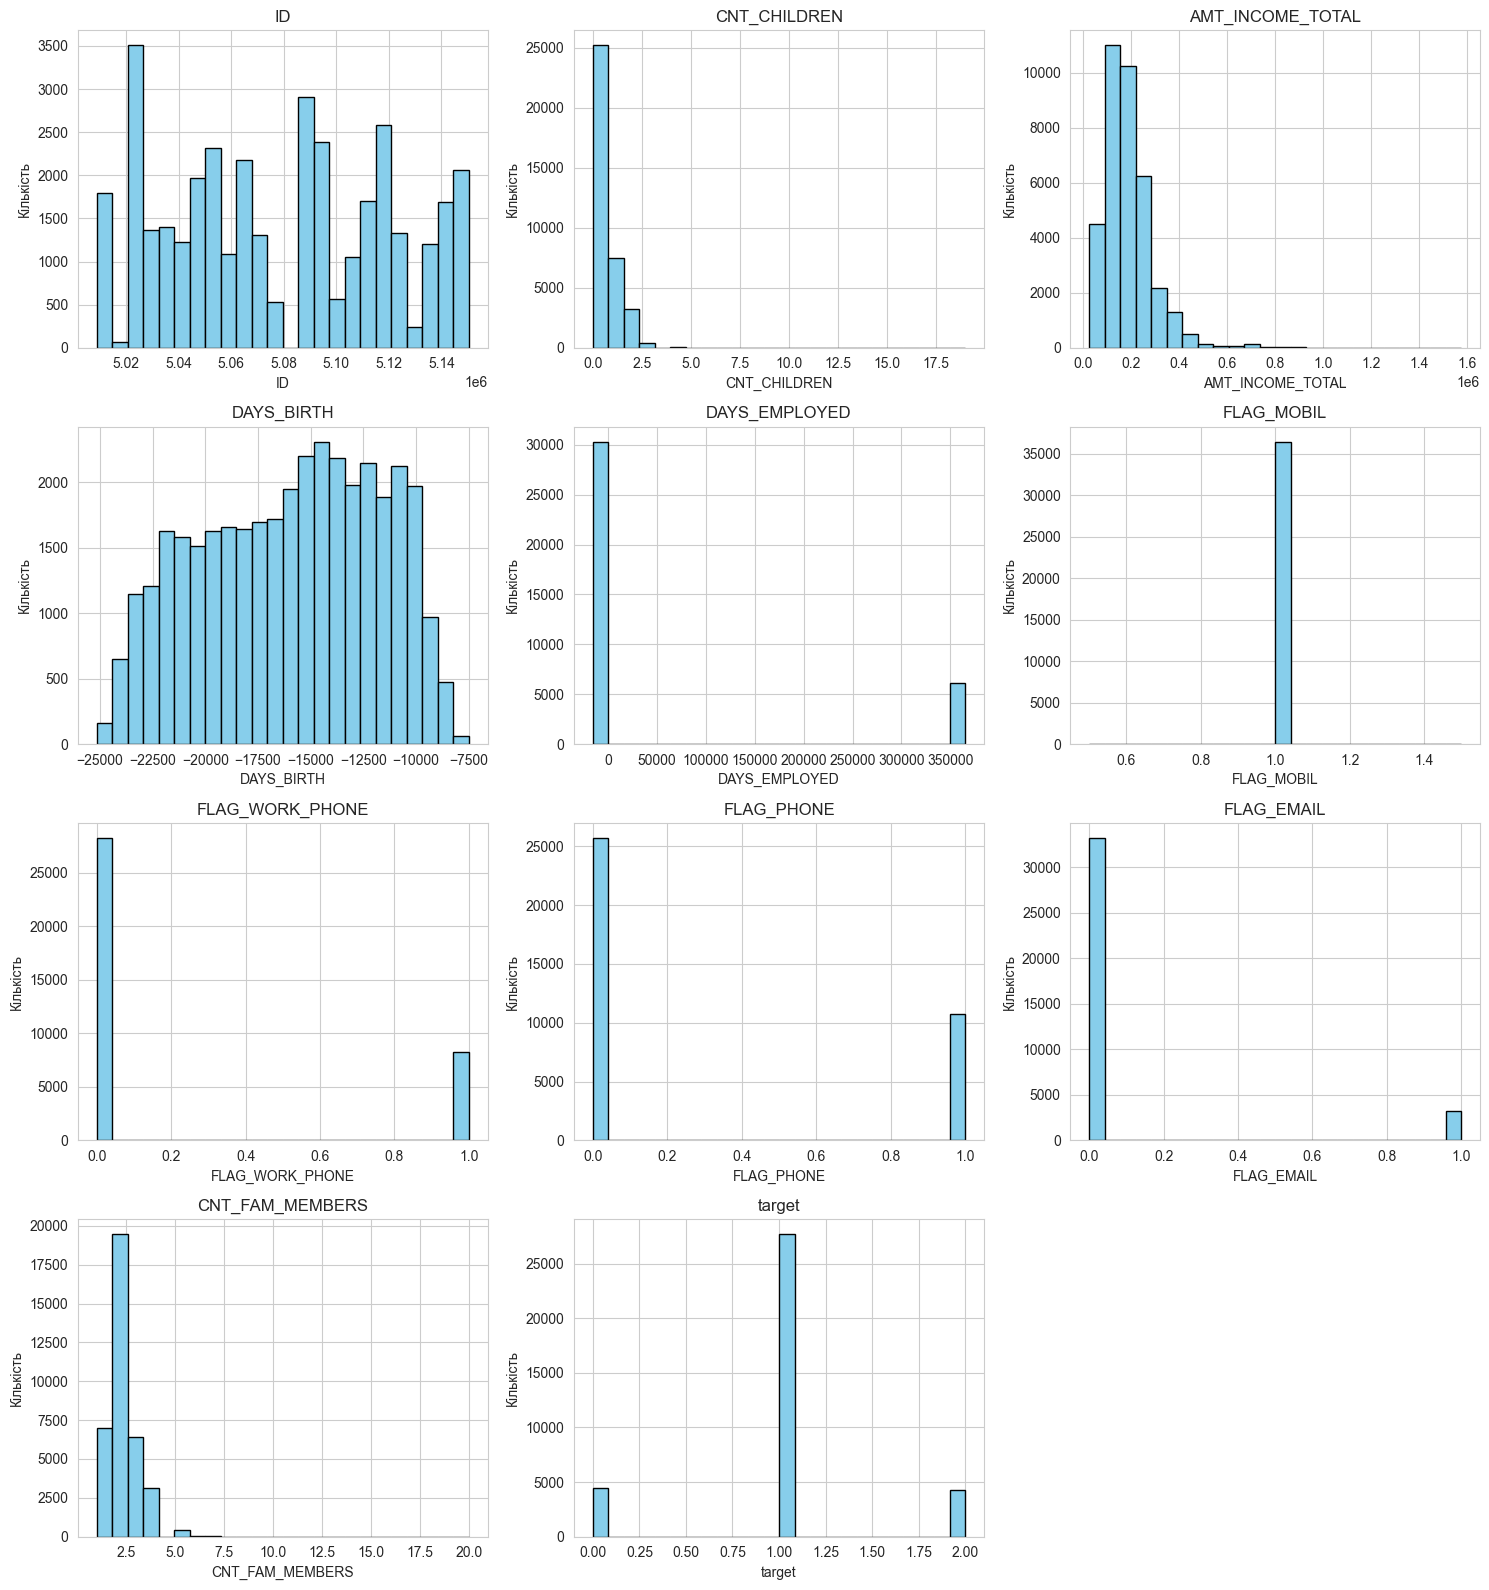

In [13]:
plot_numeric_histograms(numeric_features.columns)

### Category Features

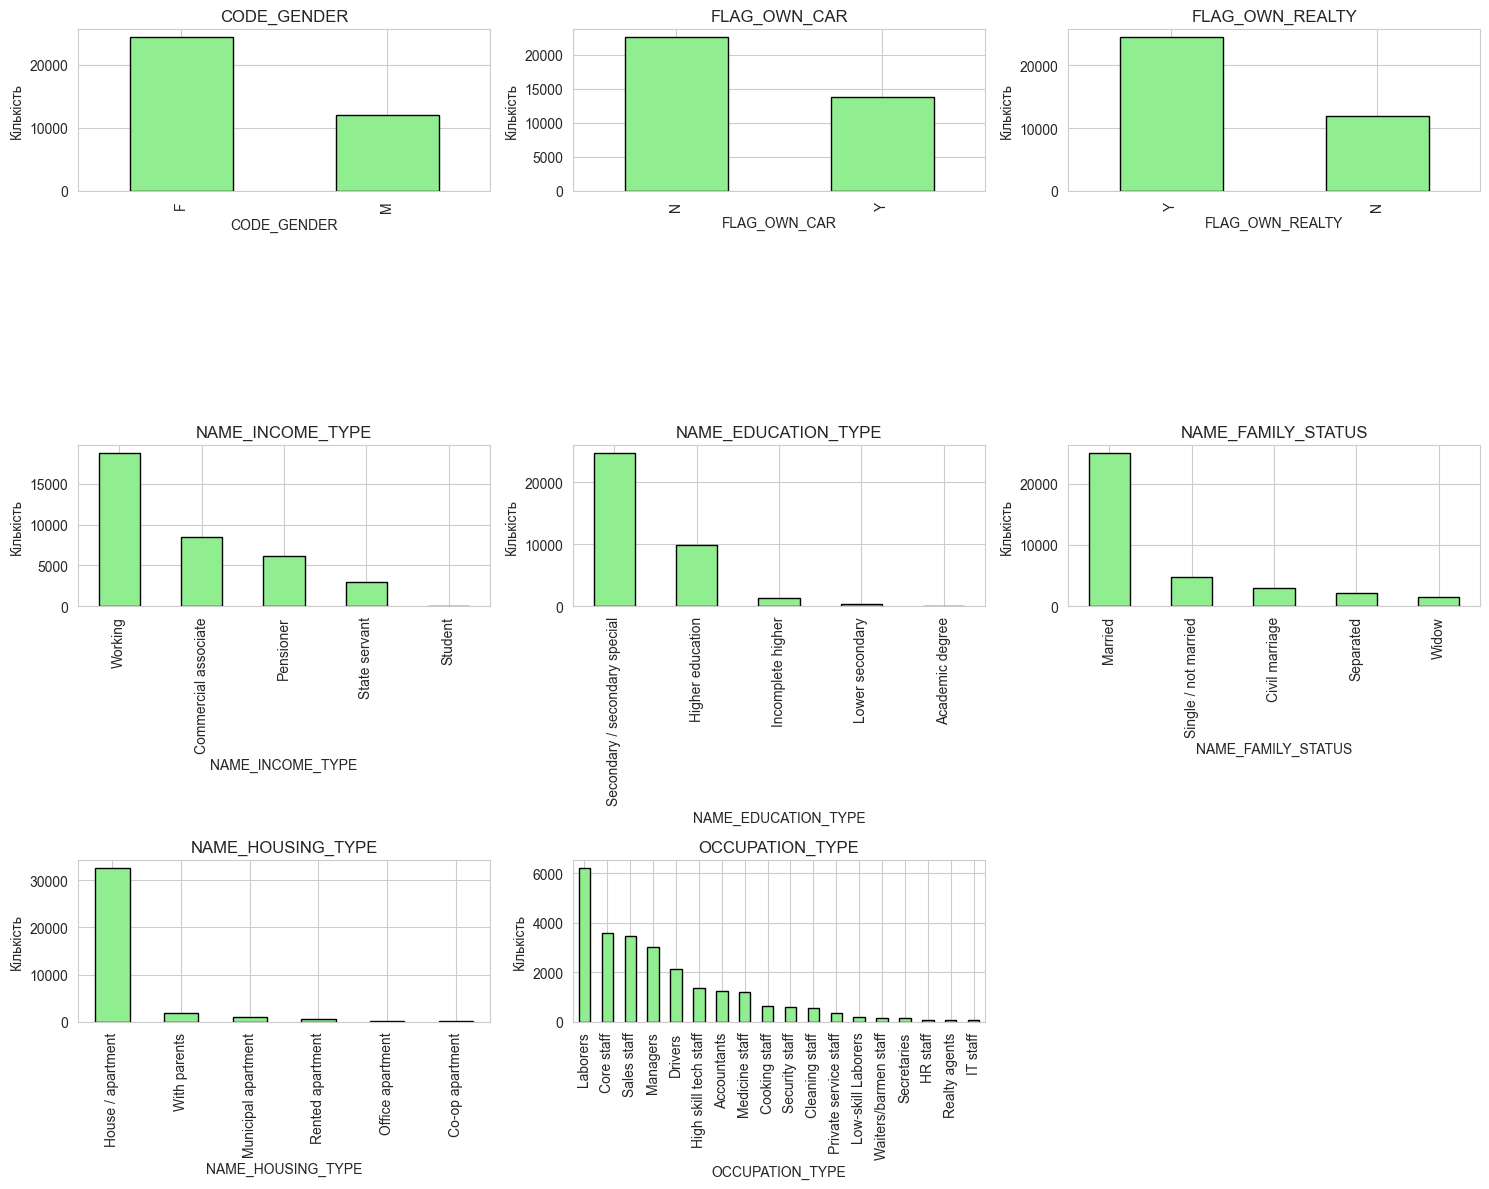

In [14]:
plot_categorical_bars(categorical_features.columns)

## Data Preprocessing

### Dropping Non-informative Features

In [15]:
df.drop(['ID', 'FLAG_MOBIL'], axis=1, inplace=True)

numeric_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object', 'category'])

### Numerical Feature Preprocessing

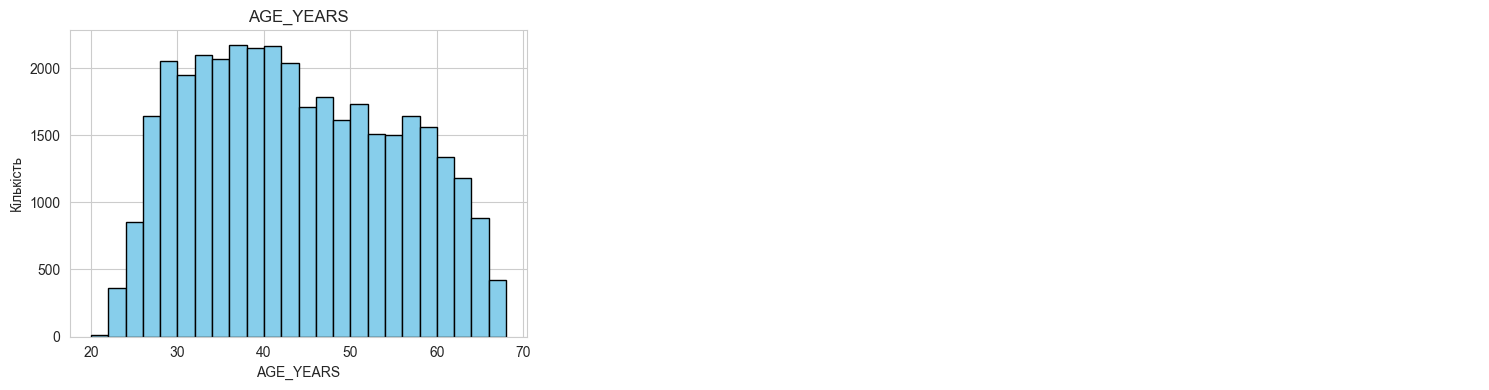

In [16]:
df['AGE_YEARS'] = np.floor(-df['DAYS_BIRTH'] / 365).astype(int)
df.drop(columns=['DAYS_BIRTH'], inplace=True)

plot_numeric_histograms(['AGE_YEARS'])

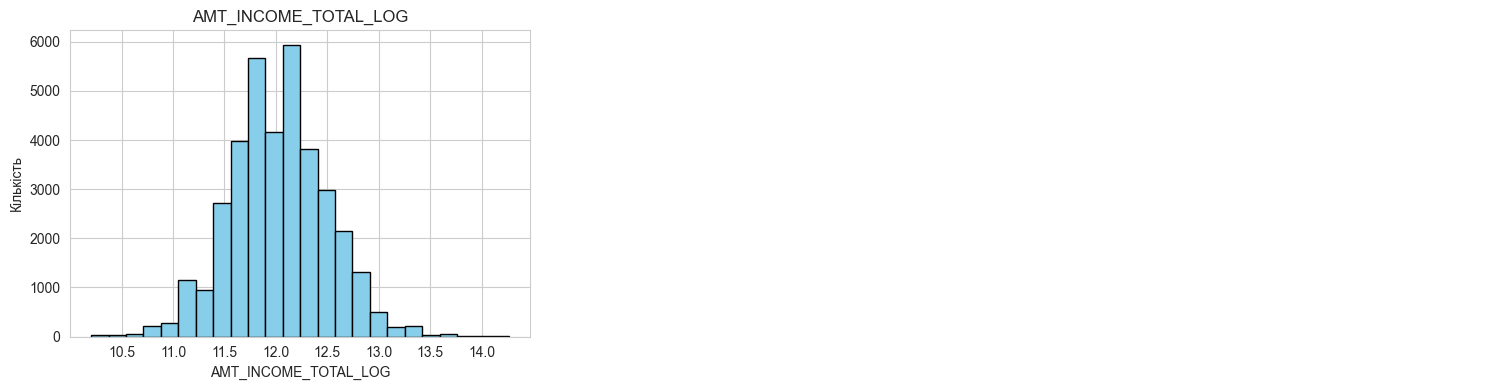

In [17]:
df['AMT_INCOME_TOTAL_LOG'] = np.log1p(df['AMT_INCOME_TOTAL'])
df.drop(columns=['AMT_INCOME_TOTAL'], inplace=True)

plot_numeric_histograms(['AMT_INCOME_TOTAL_LOG'])

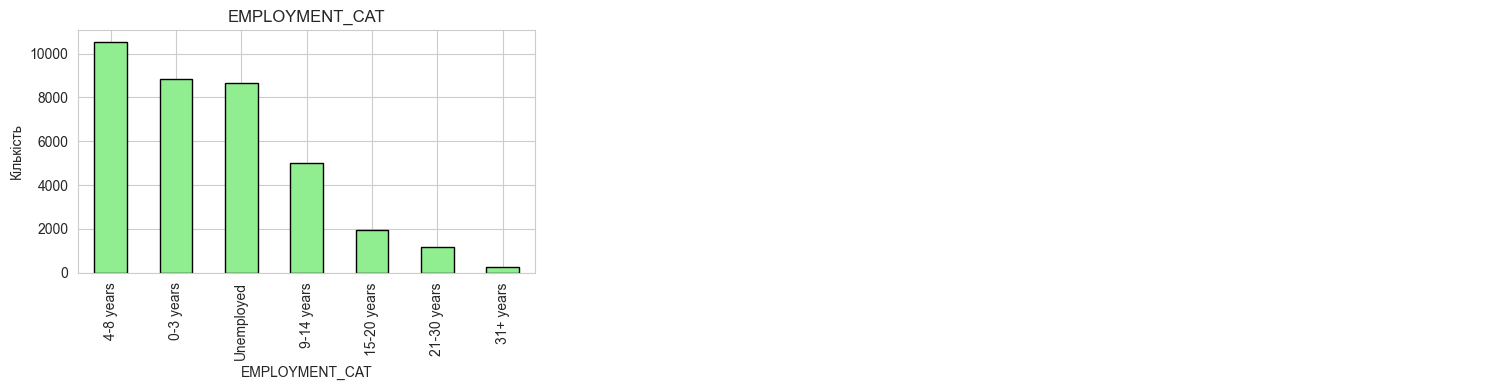

In [18]:
df['YEARS_EMPLOYED'] = np.floor(-df['DAYS_EMPLOYED'] / 365).astype(int)
df.drop(columns=['DAYS_EMPLOYED'], inplace=True)

bins = [-np.inf, 0, 3, 8, 14, 20, 30, np.inf]
labels = ['Unemployed', '0-3 years', '4-8 years', '9-14 years',
          '15-20 years', '21-30 years', '31+ years']
df['EMPLOYMENT_CAT'] = pd.cut(df['YEARS_EMPLOYED'], bins=bins, labels=labels)
plot_categorical_bars(['EMPLOYMENT_CAT'])

df.drop(columns=['YEARS_EMPLOYED'], inplace=True)

### Category Features Encoding

### Missing Data Imputation

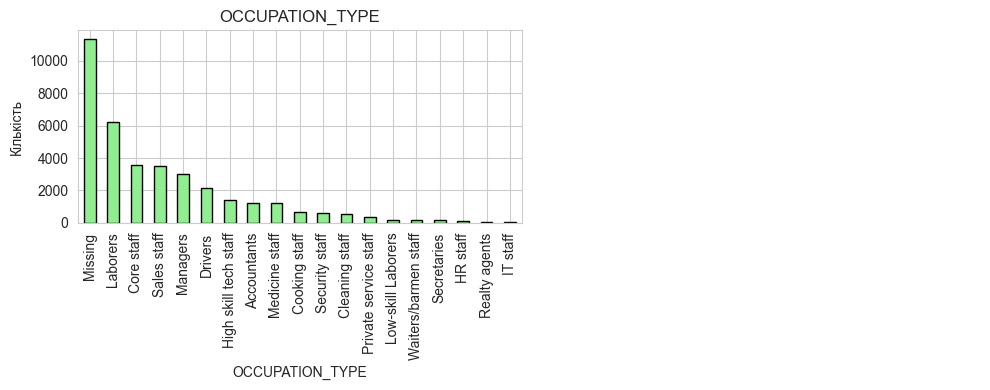

In [19]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Missing')
plot_categorical_bars(['OCCUPATION_TYPE'], n_cols=2)

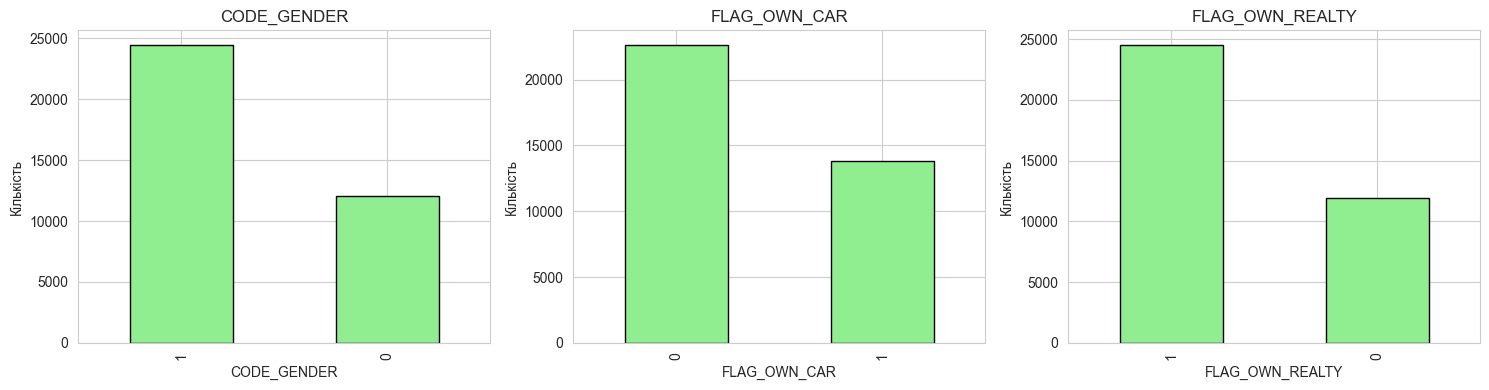

In [20]:
df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 0, 'F': 1})
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

plot_categorical_bars(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

In [21]:
education_cats = [['Lower secondary', 'Secondary / secondary special', 'Incomplete higher',
                  'Higher education', 'Academic degree']]

employment_cats = [['Unemployed', '0-3 years', '4-8 years', '9-14 years', '15-20 years',
                    '21-30 years', '31+ years']]

encoder = OrdinalEncoder(categories=education_cats)
df['EDUCATION_ENCODED'] = encoder.fit_transform(df[['NAME_EDUCATION_TYPE']])

encoder = OrdinalEncoder(categories=employment_cats)
df['EMPLOYMENT_ENCODED'] = encoder.fit_transform(df[['EMPLOYMENT_CAT']])

df.drop(['NAME_EDUCATION_TYPE', 'EMPLOYMENT_CAT'], axis=1, inplace=True)

In [22]:
df = pd.get_dummies(
    df,
    columns=['NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE'],
    prefix=['HOUSING', 'FAMILY', 'INCOME', 'OCCUPATION']
)


In [23]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'target', 'AGE_YEARS', 'AMT_INCOME_TOTAL_LOG', 'EDUCATION_ENCODED',
       'EMPLOYMENT_ENCODED', 'HOUSING_Co-op apartment',
       'HOUSING_House / apartment', 'HOUSING_Municipal apartment',
       'HOUSING_Office apartment', 'HOUSING_Rented apartment',
       'HOUSING_With parents', 'FAMILY_Civil marriage', 'FAMILY_Married',
       'FAMILY_Separated', 'FAMILY_Single / not married', 'FAMILY_Widow',
       'INCOME_Commercial associate', 'INCOME_Pensioner',
       'INCOME_State servant', 'INCOME_Student', 'INCOME_Working',
       'OCCUPATION_Accountants', 'OCCUPATION_Cleaning staff',
       'OCCUPATION_Cooking staff', 'OCCUPATION_Core staff',
       'OCCUPATION_Drivers', 'OCCUPATION_HR staff',
       'OCCUPATION_High skill tech staff', 'OCCUPATION_IT staff',
       'OCCUPATION_Laborers', 'OCCUPATION_Low-skill Laborers',
       'OCCUPATIO

## Feature Engineering

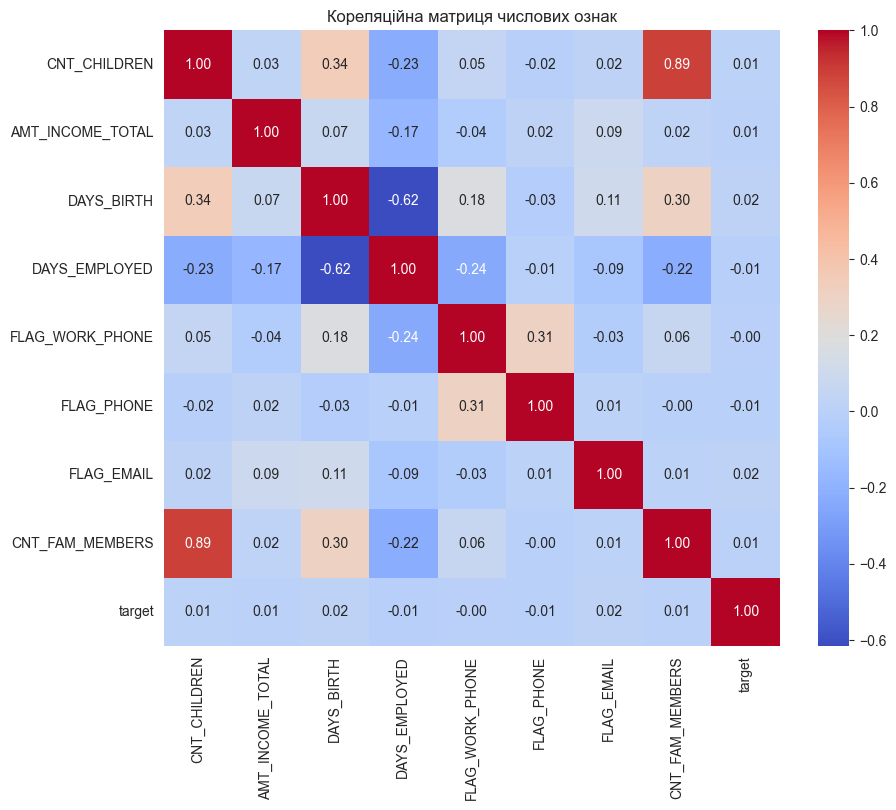

In [24]:
corr_matrix = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Кореляційна матриця числових ознак")
plt.show()

In [25]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

numeric_cols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'AMT_INCOME_TOTAL_LOG']
y = df['target']
X_num = df[numeric_cols]

anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X_num, y)

anova_scores = pd.DataFrame({
    'Feature': numeric_cols,
    'ANOVA F-score': anova_selector.scores_
}).sort_values(by='ANOVA F-score', ascending=False)

anova_scores

,Feature,ANOVA F-score
2,AGE_YEARS,16.243875
3,AMT_INCOME_TOTAL_LOG,12.489351
0,CNT_CHILDREN,2.517288
1,CNT_FAM_MEMBERS,1.478279


In [26]:
cols_to_exclude = ['target'] + list(numeric_cols)
categorical_cols = [c for c in df.columns if c not in cols_to_exclude]

X_cat = df[categorical_cols]

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_cat, y)

chi2_scores = pd.DataFrame({
    'Feature': categorical_cols,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

chi2_scores

,Feature,Chi2 Score
36,OCCUPATION_Missing,15.858527
33,OCCUPATION_Low-skill Laborers,14.259625
5,FLAG_EMAIL,14.053455
19,INCOME_Commercial associate,12.828560
37,OCCUPATION_Private service staff,11.082379
41,OCCUPATION_Security staff,10.716608
20,INCOME_Pensioner,10.222956
2,FLAG_OWN_REALTY,9.865049
35,OCCUPATION_Medicine staff,9.062894
27,OCCUPATION_Core staff,6.868054


In [27]:
df.drop(columns=['CNT_FAM_MEMBERS'], inplace=True)

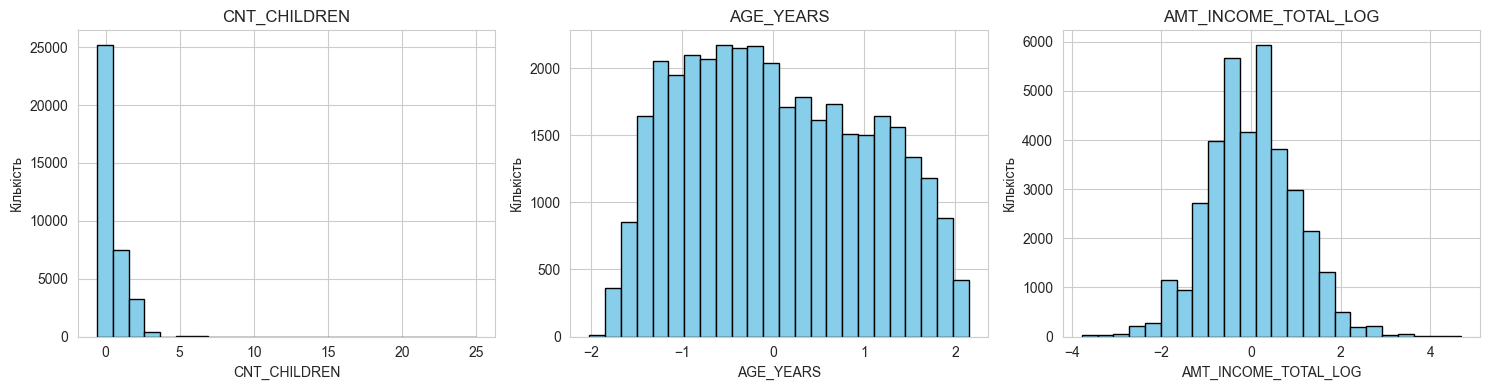

In [28]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['CNT_CHILDREN', 'AGE_YEARS', 'AMT_INCOME_TOTAL_LOG']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
plot_numeric_histograms(numeric_cols)

## Train-Test Split

In [29]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [30]:
y_train.value_counts()

target
1    22168
0     3564
2     3433
Name: count, dtype: int64

## SMOTE

In [31]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

/Users/artemsomar/Desktop/Machine Learning/university/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [32]:
y_smote.value_counts()

target
1    22168
0    22168
2    22168
Name: count, dtype: int64

In [33]:
from sklearn.utils import shuffle

X_smote, y_smote = shuffle(X_smote, y_smote, random_state=42)

# Modeling

### Basic Functions

In [34]:
def plot_history(history):
    hist = history.history
    epochs = range(1, len(hist['loss']) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, hist['loss'], label='Training Loss')
    plt.plot(epochs, hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.grid(True)


    plt.subplot(1, 2, 2)
    plt.plot(epochs, hist['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [35]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test,
                       epochs=20, batch_size=32, validation_split=0.2, verbose=1):

    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        shuffle=True,
        verbose=verbose
    )

    # Прогнози
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Репорт
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    return history

In [36]:
def build_base_model(input_dim, activation):
    model = Sequential([
    Input(shape=(input_dim, )),
    Dense(128, activation=activation),
    Dense(64, activation=activation),
    Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [37]:
def build_complex_model(input_dim, activation):
    model = Sequential([
        Input(shape=(input_dim,)),

        Dense(256, activation=activation, kernel_regularizer=l2(0)),
        BatchNormalization(),
        Dropout(0.2),

        Dense(128, activation=activation, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0),

        Dense(64, activation=activation, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        Dropout(0),

        Dense(3, activation='softmax')
    ])


    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

### ReLU

In [38]:
input_dim = X_train.shape[1]
model = build_base_model(input_dim, 'relu')

history = train_and_evaluate(model, X_smote, y_smote, X_test, y_test)


Epoch 1/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 958us/step - accuracy: 0.4274 - loss: 1.0557 - val_accuracy: 0.5276 - val_loss: 0.9360
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.5592 - loss: 0.9025 - val_accuracy: 0.5950 - val_loss: 0.8477
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.6171 - loss: 0.8123 - val_accuracy: 0.6147 - val_loss: 0.8091
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.6515 - loss: 0.7596 - val_accuracy: 0.6451 - val_loss: 0.7678
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.6771 - loss: 0.7164 - val_accuracy: 0.6718 - val_loss: 0.7231
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.6908 - loss: 0.6885 - val_accuracy: 0.6848 - val_loss: 0.7021
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.7105 - loss: 0.6572 - val_accuracy: 0.6997 - val_loss: 0.6796
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7227 - l

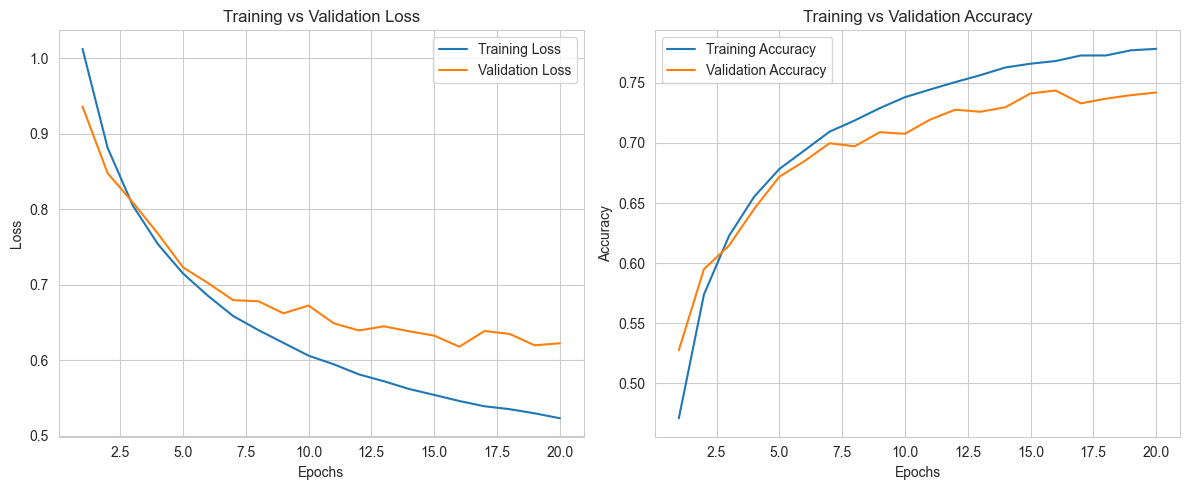

In [39]:
plot_history(history)

In [40]:
model = build_complex_model(input_dim, 'relu')

history = train_and_evaluate(model, X_smote, y_smote, X_test, y_test)

Epoch 1/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4385 - loss: 1.1302 - val_accuracy: 0.5730 - val_loss: 0.9159
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5657 - loss: 0.9283 - val_accuracy: 0.6136 - val_loss: 0.8516
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5988 - loss: 0.8704 - val_accuracy: 0.6432 - val_loss: 0.7979
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6249 - loss: 0.8347 - val_accuracy: 0.6628 - val_loss: 0.7750
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6469 - loss: 0.8039 - val_accuracy: 0.6871 - val_loss: 0.7435
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6591 - loss: 0.7821 - val_accuracy: 0.6873 - val_loss: 0.7377
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6680 - loss: 0.7681 - val_accuracy: 0.7012 - val_loss: 0.7266
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6831 - loss: 0.7515 - 

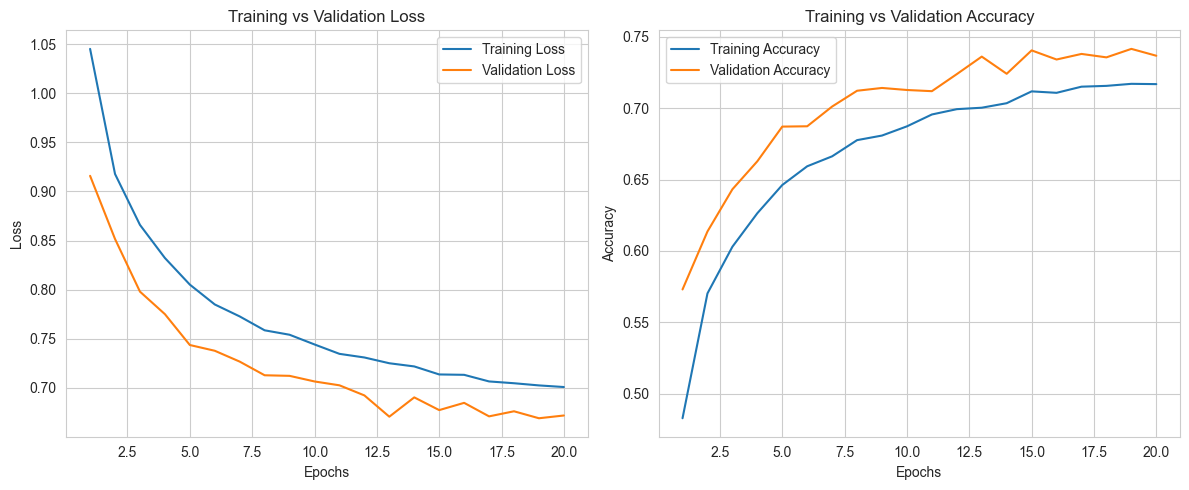

In [41]:
plot_history(history)

### LeakyReLU

In [42]:
base_model = build_base_model(input_dim, LeakyReLU(alpha=0.1))

history = train_and_evaluate(base_model, X_smote, y_smote, X_test, y_test)

Epoch 1/20


/Users/artemsomar/Desktop/Machine Learning/university/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4198 - loss: 1.0580 - val_accuracy: 0.4827 - val_loss: 1.0219
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.5327 - loss: 0.9347 - val_accuracy: 0.5800 - val_loss: 0.8750
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.5981 - loss: 0.8495 - val_accuracy: 0.5989 - val_loss: 0.8385
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.6313 - loss: 0.7970 - val_accuracy: 0.6391 - val_loss: 0.7840
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.6557 - loss: 0.7592 - val_accuracy: 0.6581 - val_loss: 0.7554
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6813 - loss: 0.7222 - val_accuracy: 0.6541 - val_loss: 0.7590
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.6892 - loss: 0.7004 - val_accuracy: 0.6502 - val_loss: 0.7617
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7011 - loss: 0.6806 - v

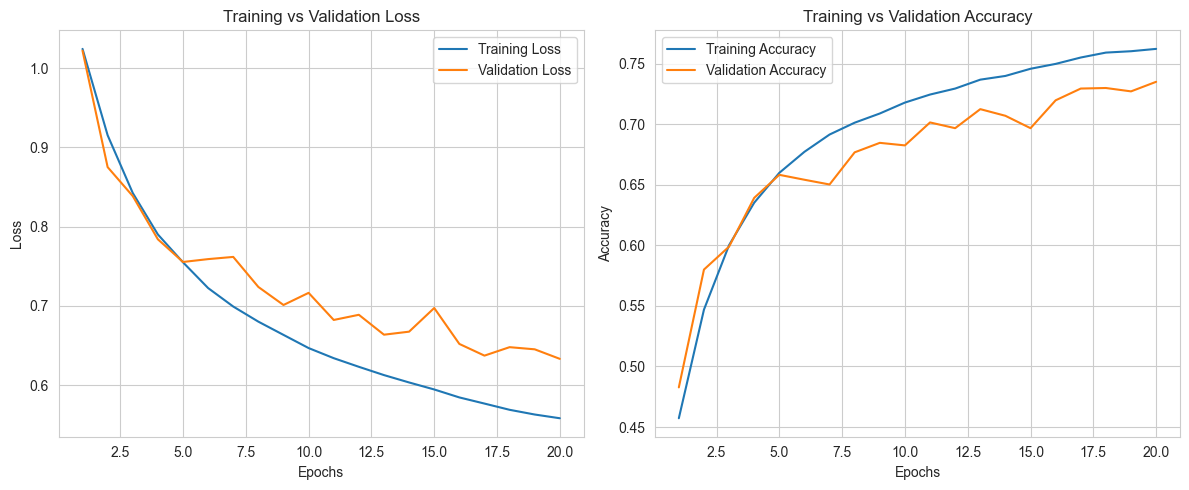

In [43]:
plot_history(history)

In [44]:
complex_model = build_complex_model(input_dim, LeakyReLU(alpha=0.1))

history = train_and_evaluate(complex_model, X_smote, y_smote, X_test, y_test)

Epoch 1/20


/Users/artemsomar/Desktop/Machine Learning/university/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4305 - loss: 1.1252 - val_accuracy: 0.5437 - val_loss: 0.9368
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5378 - loss: 0.9573 - val_accuracy: 0.5921 - val_loss: 0.8783
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5696 - loss: 0.9089 - val_accuracy: 0.6191 - val_loss: 0.8353
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6009 - loss: 0.8688 - val_accuracy: 0.6397 - val_loss: 0.8123
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6158 - loss: 0.8452 - val_accuracy: 0.6531 - val_loss: 0.7945
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6264 - loss: 0.8351 - val_accuracy: 0.6750 - val_loss: 0.7655
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6432 - loss: 0.8106 - val_accuracy: 0.6758 - val_loss: 0.7616
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6512 - loss: 0.8022 - val_accurac

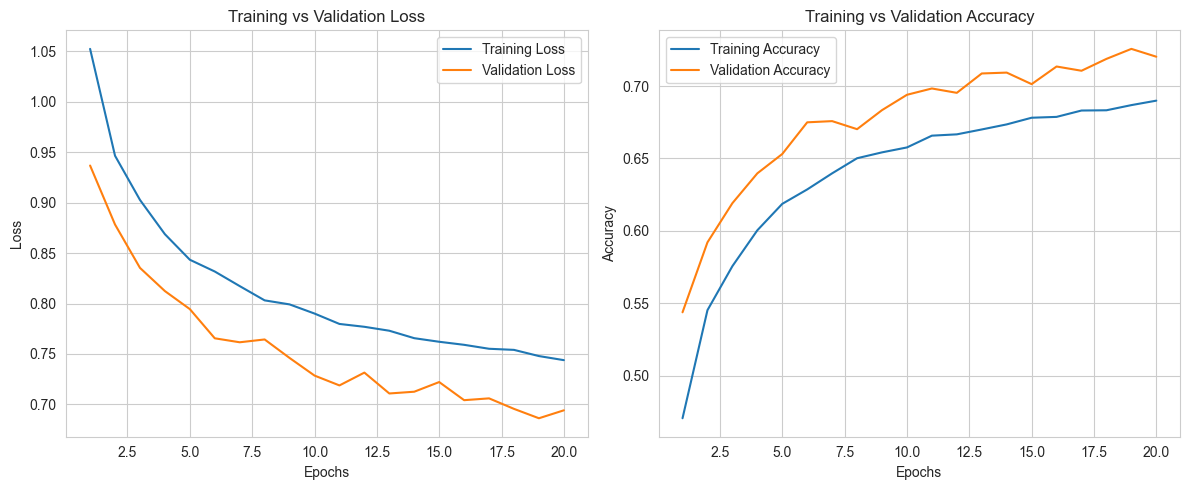

In [45]:
plot_history(history)

### GELU

In [46]:
base_model = build_base_model(input_dim, Activation(gelu))

history = train_and_evaluate(base_model, X_smote, y_smote, X_test, y_test)

Epoch 1/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step - accuracy: 0.4060 - loss: 1.0645 - val_accuracy: 0.4872 - val_loss: 0.9833
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.4904 - loss: 0.9683 - val_accuracy: 0.5221 - val_loss: 0.9298
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.5363 - loss: 0.9123 - val_accuracy: 0.5288 - val_loss: 0.9205
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.5768 - loss: 0.8646 - val_accuracy: 0.5845 - val_loss: 0.8444
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.6034 - loss: 0.8259 - val_accuracy: 0.6001 - val_loss: 0.8199
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.6283 - loss: 0.7867 - val_accuracy: 0.6260 - val_loss: 0.7913
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.6500 - loss: 0.7527 - val_accuracy: 0.6424 - val_loss: 0.7754
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.6735 -

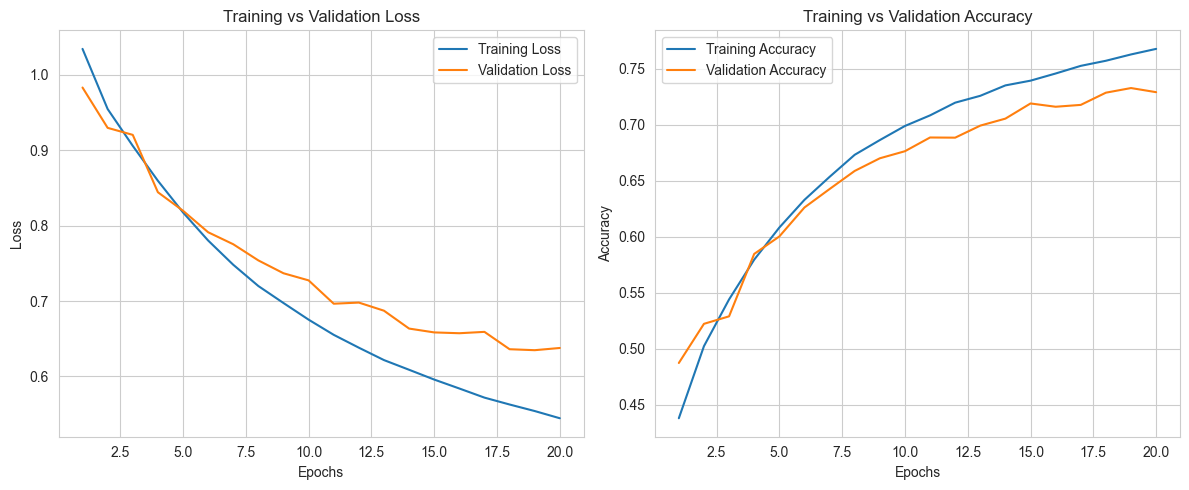

In [47]:
plot_history(history)

In [48]:
complex_model = build_complex_model(input_dim, Activation(gelu))

history = train_and_evaluate(complex_model, X_smote, y_smote, X_test, y_test)

Epoch 1/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4346 - loss: 1.1251 - val_accuracy: 0.5551 - val_loss: 0.9282
Epoch 2/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5435 - loss: 0.9508 - val_accuracy: 0.6025 - val_loss: 0.8594
Epoch 3/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5912 - loss: 0.8845 - val_accuracy: 0.6397 - val_loss: 0.8143
Epoch 4/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6243 - loss: 0.8381 - val_accuracy: 0.6665 - val_loss: 0.7724
Epoch 5/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6500 - loss: 0.7976 - val_accuracy: 0.6804 - val_loss: 0.7506
Epoch 6/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6617 - loss: 0.7831 - val_accuracy: 0.7039 - val_loss: 0.7164
Epoch 7/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6740 - loss: 0.7646 - val_accuracy: 0.7033 - val_loss: 0.7207
Epoch 8/20
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6828 - loss: 0.7501 - 